# Assignment 2

**Credits**: Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: Sexism Detection, Multi-class Classification, LLMs, Prompting


# Contact

For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

* Federico Ruggeri -> federico.ruggeri6@unibo.it
* Eleonora Mancini -> e.mancini@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it

# Relevant Material

- Tutorial 3
- Huggingface documentation
- Huggingface hub

# Introduction

You are tasked to address the [EDOS Task A](https://github.com/rewire-online/edos) on sexism detection.

## Problem definition

Given an input text sentence, the task is to label the sentence as sexist or not sexist (binary classification).

### Examples:

**Text**: *``Schedule a date with her, then don't show up. Then text her "GOTCHA B___H".''*

**Label**: Sexist

**Text**: *``That’s completely ridiculous a woman flashing her boobs is not sexual assault in the slightest.''*

**Label**: Not sexist



## Approach

We will tackle the binary classification task with LLMs.

In particular, we'll consider zero-/few-shot prompting approaches to assess the capability of some popular open-source LLMs on this task.

## Preliminaries

We are going to download LLMs from [Huggingface](https://huggingface.co/).

Many of these open-source LLMs require you to accept their "Community License Agreement" to download them.

In summary:

- If not already, create an account of Huggingface (~2 mins)
- Check a LLM model card page (e.g., [Mistral v3](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3)) and accept its "Community License Agreement".
- Go to your account -> Settings -> Access Tokens -> Create new token -> "Repositories permissions" -> add the LLM model card you want to use.
- Save the token (we'll need it later)

### Huggingface Login

Once we have created an account and an access token, we need to login to Huggingface via code.

- Type your token and press Enter
- You can say No to Github linking

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

After login, you can download all models associated with your access token in addition to those that are not protected by an access token.

### Data Loading

Since we are only interested in prompting, we do not require a train dataset.

We have preparared a small test set version of EDOS in our dedicated [Github repository](https://github.com/lt-nlp-lab-unibo/nlp-course-material).

Check the ``Assignment 2/data`` folder.
It contains:

- ``a2_test.csv`` → a small test set of 300 samples.
- ``demonstrations.csv`` -> a batch of 1000 samples for few-shot prompting.

Both datasets contain a balanced number of sexist and not sexist samples.


In [2]:
import pandas as pd

demo_data = pd.read_csv("/kaggle/input/nlp-task2-dataset/data/demonstrations.csv")
test_data = pd.read_csv("/kaggle/input/nlp-task2-dataset/data/a2_test.csv")

In [3]:
max_length = test_data['text'].apply(len).max() + 5000

In [4]:
test_data = test_data.drop(["rewire_id"],axis = 1)
test_data['label_sexist'] = test_data['label_sexist'].replace({'sexist': 1, 'not sexist': 0})
test_data.head(10)

/tmp/ipykernel_23/3907645047.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['label_sexist'] = test_data['label_sexist'].replace({'sexist': 1, 'not sexist': 0})


,text,label_sexist
0,The boys must be gaming because there goes the...,0
1,Look at those eyes. Either someone unexpectedl...,1
2,Old man mogs everyone in this sub,0
3,"Excellent, I was just looking at another post ...",0
4,So you run back to daddy whenever you need hel...,1
5,"Don't think that using the word ""feminine"" was...",1
6,‪Import the third world and become the third w...,0
7,Most women find a highly educated and well tra...,0
8,That's female fantasy. I have a lot of experie...,1
9,Miss Pony [USER] posting her own home made por...,1


In [5]:
demo_data = demo_data.drop(["rewire_id"],axis = 1)
demo_data['label_sexist'] = demo_data['label_sexist'].replace({'sexist': 1, 'not sexist': 0})
demo_data.head(10)

/tmp/ipykernel_23/292542436.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  demo_data['label_sexist'] = demo_data['label_sexist'].replace({'sexist': 1, 'not sexist': 0})


,text,label_sexist
0,I would never have my kid go to a daycare with...,0
1,Democrat women are so butt fucking ugly.,1
2,If you really wanted to twist the knife you’d ...,0
3,Those women are pro-rape. They didn’t care abo...,1
4,Married a bitch... Is it the standard scenario...,1
5,Cause you said “was” going to be a against her...,1
6,Sounds like your sister is trying to make you ...,1
7,Don't bother arguing with women. They don't ca...,1
8,Trump's America where police take no shit from...,1
9,So she was groped in front of a blind man who ...,1


### Instructions

We require you to:

* **Download** the ``A2/data`` folder.
* **Encode** ``a2_test.csv`` into a ``pandas.DataFrame`` object.

# [Task 1 - 0.5 points] Model setup

Once the test data has been loaded, we have to setup the model pipeline for inference.

In particular, we have to:
- Load the model weights from Huggingface
- Quantize the model to fit into a single-GPU limited hardware

## Which LLMs?

The pool of LLMs is ever increasing and it's impossible to keep track of all new entries.

We focus on popular open-source models.

- [Mistral v2](mistralai/Mistral-7B-Instruct-v0.2)
- [Mistral v3](mistralai/Mistral-7B-Instruct-v0.3)
- [Llama v3.1](https://huggingface.co/meta-llama/Llama-3.1-8B-Instruct)
- [Phi3-mini](https://huggingface.co/microsoft/Phi-3-mini-4k-instruct)

Other open-source models are more than welcome!

### Instructions

In order to get Task 1 points, we require you to:

* Pick 2 model cards from the provided list.
* For each model:
  - Define a separate section of your notebook for the model.
  - Setup a quantization configuration for the model.
  - Load the model via HuggingFace APIs.


### Notes

1. There's a popular library integrated with Huggingface's ``transformers`` to perform quantization.

2. Define two separate sections of your notebook to show that you have implemented the prompting pipeline for each selected model card.

In [6]:
#install useful libraries
!pip install transformers
!pip install datasets
!pip install accelerate -U
!pip install evaluate
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 6.2 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 25.6 MB/s eta 0:00:00:00:0100:01


In [7]:
#import some useful datasets
# system packages
from pathlib import Path
import shutil
import urllib
import tarfile
import sys

# data and numerical management packages
import pandas as pd
import numpy as np

# useful during debugging (progress bars)
from tqdm import tqdm

import os

#other packages
import torch
from transformers import BitsAndBytesConfig

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 2560,
        'height': 1440,
        'scroll': True,
})

{'width': 2560, 'height': 1440, 'scroll': True}

In [8]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

def set_up_model(model_card):
  tokenizer = AutoTokenizer.from_pretrained(model_card)
  tokenizer.pad_token = tokenizer.eos_token
  tokenizer.padding_side = "left"
  tokenizer.model_max_length = max_length

  terminators= [
      tokenizer.eos_token_id,
      tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  bnb_config = BitsAndBytesConfig(
      load_in_4bit=True,
      bnb_4bit_use_double_quant=True,
      bnb_4bit_quant_type="nf4",
      bnb_4bit_compute_dtype=torch.bfloat16,
  )

  # Load the model with the configuration
  model = AutoModelForCausalLM.from_pretrained(
      model_card,
      quantization_config=bnb_config,
      device_map="auto"
  )

  return model, tokenizer

### Gwen

In [9]:
model_qwen, tokenizer_qwen = set_up_model("Qwen/Qwen2-7B-Instruct")

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

### Mistral

In [9]:
model_mistral, tokenizer_mistral = set_up_model("mistralai/Mistral-7B-Instruct-v0.3")

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

# [Task 2 - 1.0 points] Prompt setup

Prompting requires an input pre-processing phase where we convert each input example into a specific instruction prompt.


## Prompt Template

Use the following prompt template to process input texts.

In [10]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        TEXT:
        {text}

        ANSWER:
        """
    }
]

### Instructions

In order to get Task 2 points, we require you to:

* Write a ``prepare_prompts`` function as the one reported below.

In [11]:
def prepend_prompt(example, prompt):
    return prompt.format(text=example)

def prepare_prompts(texts, prompt_template, tokenizer):
    """
    This function format input text samples into instructions prompts.

    Inputs:
      texts: input texts to classify via prompting
      prompt_template: the prompt template provided in this assignment
      tokenizer: the transformers Tokenizer object instance associated with the chosen model card

    Outputs:
      input texts to classify in the form of instruction prompts
    """
    data = texts.map(lambda example: prepend_prompt(example, prompt_template))

    encoded_prompt = tokenizer.batch_encode_plus([it for it in data["text"]], return_tensors='pt', padding=True, truncation=True, padding_side='left')
    return encoded_prompt

### Notes

1. You are free to modify the prompt format (**not its content**) as you like depending on your code implementation.

2. Note that the provided prompt has placeholders. You need to format the string to replace placeholders. Huggingface might have dedicated APIs for this.

### Qwen

In [12]:
prompt_qwen = tokenizer_qwen.apply_chat_template(prompt, tokenize=False, add_generation_prompt=True)

enc_prompt_qwen = prepare_prompts(test_data, prompt_qwen, tokenizer_qwen)

### Mistral

In [12]:
prompt_mistral = tokenizer_mistral.apply_chat_template(prompt, tokenize=False, add_generation_prompt=True)

enc_prompt_mistral = prepare_prompts(test_data, prompt_mistral, tokenizer_mistral)

# [Task 3 - 1.0 points] Inference

We are now ready to define the inference loop where we prompt the model with each pre-processed sample.

### Instructions

In order to get Task 3 points, we require you to:

* Write a ``generate_responses`` function as the one reported below.
* Write a ``process_response`` function as the one reported below.

In [13]:
import re

def extract_response(response, template):
    match = [m for m in re.finditer(template, response)][-1]
    parsed = response[match.end():].strip()
    return parsed

def convert_response(response):
    return 1 if 'YES' in response else 0

In [14]:
def generate_responses(model, prompt_examples, tokenizer, batch_size=8):
    """
    This function implements the inference loop for a LLM model.
    Given a set of examples, the model is tasked to generate a response.

    Inputs:
      model: LLM model instance for prompting
      prompt_examples: pre-processed text samples

    Outputs:
      generated responses
    """

    #define the generation config
    generation_config = model.generation_config
    generation_config.max_new_tokens = 10
    generation_config.eos_token_id = tokenizer.eos_token_id
    generation_config.pad_token_id = tokenizer.eos_token_id
    generation_config.num_return_sequences = 1
    generation_config.do_sample = False

    raw_responses = []
    with torch.inference_mode():
        # Split the data into batches
        input_ids = prompt_examples['input_ids']
        attention_mask = prompt_examples['attention_mask']
        num_examples = input_ids.size(0)

        for start_idx in tqdm(range(0, num_examples, batch_size), desc="Generating batches"):
            end_idx = min(start_idx + batch_size, num_examples)

            # Prepare the batch
            batch_input_ids = input_ids[start_idx:end_idx].to(model.device)
            batch_attention_mask = attention_mask[start_idx:end_idx].to(model.device)

            # Generate responses for the current batch
            response = model.generate(
                input_ids=batch_input_ids,
                attention_mask=batch_attention_mask,
                generation_config=generation_config,
                do_sample=False,
                use_cache=True
            )

            # Decode and process responses
            batch_raw_responses = tokenizer.batch_decode(response, skip_special_tokens=True)

            raw_responses.extend(batch_raw_responses)
    return raw_responses


In [15]:
def process_response(response, template):
    """
    This function takes a textual response generated by the LLM
    and processes it to map the response to a binary label.

    Inputs:
      response: generated response from LLM

    Outputs:
      parsed binary response: return 1 if YES and 0 if NO
    """
    raw_responses = [extract_response(item, template) for item in response]
    predictions = [convert_response(item) for item in raw_responses]
    return predictions

### Notes

1. According to our tests, it should take you ~10 mins to perform full inference on 300 samples.

### Qwen

In [16]:
raw_resp_qwen = generate_responses(model_qwen, enc_prompt_qwen, tokenizer_qwen)

Generating batches:   0%|          | 0/38 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:612: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
Generating batches: 100%|██████████| 38/38 

In [17]:
pred_qwen = process_response(raw_resp_qwen, '\n        \nassistant\n')

### Mistral

In [16]:
raw_resp_mistral = generate_responses(model_mistral, enc_prompt_mistral, tokenizer_mistral)

Generating batches: 100%|██████████| 38/38 [02:48<00:00,  4.44s/it]


In [17]:
pred_mistral = process_response(raw_resp_mistral, 'ANSWER:\n')

# [Task 4 - 0.5 points] Metrics

In order to evaluate selected LLMs, we need to compute performance metrics.

In particular, we are interested in computing **accuracy** since the provided data is balanced with respect to classification classes.

Moreover, we want to compute the ratio of failed responses generated by models.

That is, how frequent the LLM fails to follow instructions and provides incorrect responses that do not address the classification task.

We denote this metric as **fail-ratio**.

In summary, we parse generated responses as follows:
- 1 if the model says YES
- 0 if the model says NO
- 0 if the model does not answer in either way

### Instructions

In order to get Task 4 points, we require you to:

* Write a ``compute_metrics`` function as the one reported below.
* Compute metrics for the two selected LLMs.

In [18]:
import evaluate

accuracy_metric = evaluate.load("accuracy")
def compute_metrics(responses, y_true):
    """
    This function takes predicted and ground-truth labels and compute metrics.
    In particular, this function compute accuracy and fail-ratio metrics.
    This function internally invokes process_response to compute metrics.

    Inputs:
      responses: generated LLM responses
      y_true: ground-truth binary labels

    Outputs:
      dictionary containing desired metrics
    """
    accuracy_result = accuracy_metric.compute(predictions=responses, references=y_true)
    accuracy = accuracy_result['accuracy']

    # Compute fail-ratio
    fail_ratio = 1 - accuracy

    # Return metrics
    return {
        "accuracy": accuracy,
        "fail_ratio": fail_ratio
    }

### Qwen

In [19]:
results_qwen = compute_metrics(pred_qwen, test_data['label_sexist'])
print(results_qwen)

{'accuracy': 0.7333333333333333, 'fail_ratio': 0.2666666666666667}


### Mistral

In [19]:
results_mistral = compute_metrics(pred_mistral, test_data['label_sexist'])
print(results_mistral)

{'accuracy': 0.59, 'fail_ratio': 0.41000000000000003}


# [Task 5 - 1.0 points] Few-shot Inference

So far, we have tested models in a zero-shot fashion: we provide the input text to classify and instruct the model to generate a response.

We are now interested in performing few-shot prompting to see the impact of providing demonstration examples.

To do so, we slightly change the prompt template as follows.

In [20]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        EXAMPLES:
        {examples}

        TEXT:
        {text}

        ANSWER:
        """
    }
]

The new prompt template reports some demonstration examples to instruct the model.

Generally, we provide an equal number of demonstrations per class as shown in the example below.

## Instructions

In order to get Task 5 points, we require you to:

- Load ``demonstrations.csv`` and encode it into a ``pandas.DataFrame`` object.
- Define a ``build_few_shot_demonstrations`` function as the one reported below.
- Perform few-shot inference as in Task 3.
- Compute metrics as in Task 4.

In [21]:
import random

random_seed = 41
def set_random_seed(seed=42):
    """
    Fixes the random seed for reproducibility.
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_random_seed(random_seed)

In [22]:
def build_few_shot_demonstrations(demonstrations, num_per_class=2):
    """
    Inputs:
      demonstrations: pandas.DataFrame object containing 'text' and 'label_sexist' columns.
      num_per_class: number of examples to sample per class.

    Outputs:
      A list of textual demonstrations formatted in a fixed YES, NO, YES, NO order.
    """
    # Sample examples by class
    sexist_examples = demonstrations[demonstrations['label_sexist'] == 1].sample(num_per_class)
    not_sexist_examples = demonstrations[demonstrations['label_sexist'] == 0].sample(num_per_class)#, random_state=random_seed)

    sexist_examples = sexist_examples.reset_index(drop=True)
    not_sexist_examples = not_sexist_examples.reset_index(drop=True)

    # Alternate between sexist and not-sexist examples
    examples = []
    for i in range(num_per_class):
        examples.append(f"TEXT: {not_sexist_examples.loc[i, 'text']}\nANSWER: NO")
        examples.append(f"TEXT: {sexist_examples.loc[i, 'text']}\nANSWER: YES")

    return examples

def concatenate_fewshot_into_string(fewshot_list):
    """
    Concatenates a list of few-shot demonstrations into a single string.
    """
    return "\n".join(fewshot_list)


In [23]:
def generate_responses_fewshot(model, texts, examples, prompt, tokenizer, examples_nr = 2, batch_size=8):
    """
    Implements batchwise inference for few-shot prompting.

    Inputs:
      model: LLM model instance for prompting.
      texts: input texts to classify.
      examples: few-shot examples string.
      batch_size: number of texts to process per batch.

    Outputs:
      Generated responses.
    """
    #define the generation config
    generation_config = model.generation_config
    generation_config.max_new_tokens = 10
    generation_config.eos_token_id = tokenizer.eos_token_id
    generation_config.pad_token_id = tokenizer.eos_token_id
    generation_config.num_return_sequences = 1
    generation_config.top_p = None 
    generation_config.do_sample = False

    raw_responses = []
    with torch.inference_mode():
        num_examples = len(texts)

        for start_idx in tqdm(range(0, num_examples, batch_size), desc="Generating batches"):
            end_idx = min(start_idx + batch_size, num_examples)
            batch_texts = texts[start_idx:end_idx]
            examples = build_few_shot_demonstrations(demo_data, examples_nr)

    
            # Convert the list of examples into a single string
            examples = concatenate_fewshot_into_string(examples)
            batch_prompts = [
                prompt.format(examples=examples, text=text) for text in batch_texts
            ]
            encoded_prompt = tokenizer.batch_encode_plus(
                batch_prompts,
                return_tensors="pt",
                padding=True,
                truncation=True,
                padding_side="left"
            )
            response = model.generate(
                input_ids=encoded_prompt["input_ids"].to(model.device),
                attention_mask=encoded_prompt["attention_mask"].to(model.device),
                generation_config=generation_config,
                do_sample=False,
                use_cache=True
            )
            batch_raw_responses = tokenizer.batch_decode(response, skip_special_tokens=True)
            raw_responses.extend(batch_raw_responses)

    return raw_responses

In [24]:
# Convert the list of examples into a single string
examples = build_few_shot_demonstrations(demo_data,2)
text_example = concatenate_fewshot_into_string(examples)

texts_to_classify = test_data['text'].tolist()

### Qwen

We will use 3 examples per classification label.

In [25]:
prompt_qwen = tokenizer_qwen.apply_chat_template(prompt, tokenize=False, add_generation_prompt=True)

In [26]:
fewshot_example = 3

# Few-shot inference
raw_resp_fewshot_qwen = generate_responses_fewshot(model_qwen, texts_to_classify, text_example, prompt_qwen, tokenizer_qwen, examples_nr = fewshot_example)

Generating batches:   0%|          | 0/38 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:612: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
Generating batches: 100%|██████████| 38/38 [04:17<00:00,  6.79s/it]


### Mistral

In [27]:
fewshot_example = 3

prompt_mistral= tokenizer_mistral.apply_chat_template(prompt, tokenize=False, add_generation_prompt=True)

In [28]:
# Few-shot inference
raw_resp_fewshot_mistral = generate_responses_fewshot(model_mistral, texts_to_classify, text_example, prompt_mistral, tokenizer_mistral, examples_nr = fewshot_example)

Generating batches: 100%|██████████| 38/38 [07:00<00:00, 11.06s/it]


## Notes

1. You are free to pick any value for ``num_per_class``.

2. According to our tests, few-shot prompting increases inference time by some minutes (we experimented with ``num_per_class`` $\in [2, 4]$).

# [Task 6 - 1.0 points] Error Analysis

We are now interested in evaluating model responses and comparing their performance.

This analysis helps us in understanding

- Classification task performance gap: are the models good at this task?
- Generation quality: which kind of responses do models generate?  ?????
- Errors: which kind of mistakes do models do?

### Instructions

In order to get Task 6 points, we require you to:

* Compare classification performance of selected LLMs in a Table.
* Compute confusion matrices for selected LLMs.
* Briefly summarize your observations on generated responses. - differente confusion matrix few shot

### Useful functions

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Process the raw responses into binary predictions
def process_response(response, template):
    raw_responses = [extract_response(item, template) for item in response]
    predictions = [convert_response(item) for item in raw_responses]
    return predictions

# Compute metrics for evaluation
def compute_metrics(responses, y_true):
    accuracy_metric = evaluate.load("accuracy")
    accuracy_result = accuracy_metric.compute(predictions=responses, references=y_true)
    accuracy = accuracy_result['accuracy']
    fail_ratio = 1 - accuracy
    return {"accuracy": accuracy, "fail_ratio": fail_ratio}


# Compute the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Sexist', 'Sexist'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

In [28]:
def compute_and_plot_metrics(pred_fewshot_raw, y_true_data, pattern):
    # Convert responses to binary predictions
    pred_fewshot= process_response(pred_fewshot_raw, pattern)
    
    # Compute metrics
    results_fewshot= compute_metrics(pred_fewshot, y_true_data)
    print(f"The resulted accuracy of the model is: {results_fewshot['accuracy'] * 100:.2f}%")
    
    # y_true is the ground truth and y_pred are the binary predictions
    y_true= y_true_data.values
    y_pred= pred_fewshot
    
    # Plot the confusion matrix
    plot_confusion_matrix(y_true, y_pred)

### Qwen

In this section we will analyze the results for the qwen model. The first confusion matrix and accuracy corresponds to the zero-shot Qwen experiment, while the second corresponds to the few-shot Qwen experiment.

Basic model performance and results
The resulted accuracy of the model is: 73.33%


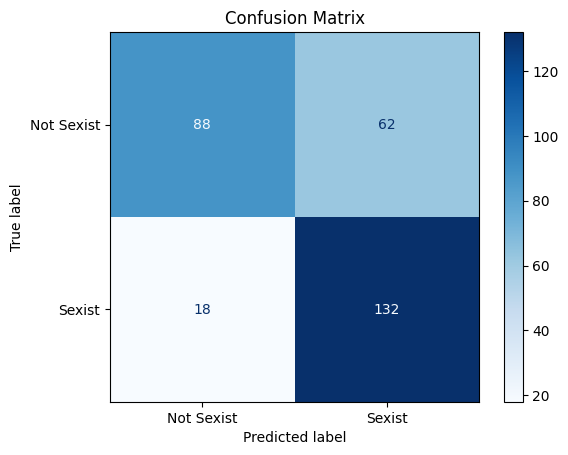



Few shot model performance and results (3 examples per category)
The resulted accuracy of the model is: 72.00%


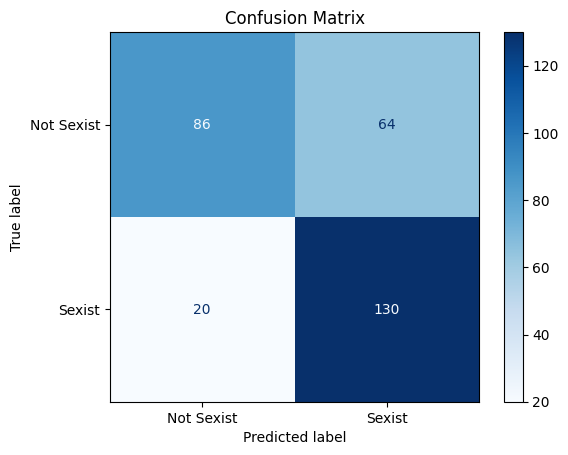

In [29]:
print("Basic model performance and results")

compute_and_plot_metrics(raw_resp_qwen, test_data['label_sexist'], pattern = '\n        \nassistant\n')

print("\n\nFew shot model performance and results (3 examples per category)")
compute_and_plot_metrics(raw_resp_fewshot_qwen, test_data['label_sexist'], pattern = '\n        \nassistant\n')

### Mistral

In this section we will analyze the results for the Mistral model. The first confusion matrix and accuracy corresponds to the zero-shot Mistral experiment, while the second corresponds to the few-shot Mistral experiment.

Basic model performance and results
The resulted accuracy of the model is: 59.00%


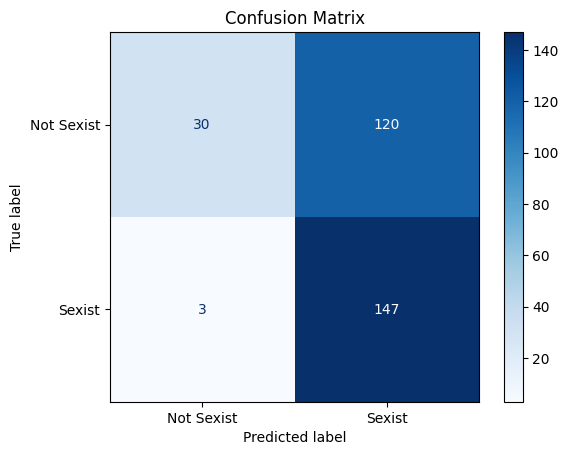



Few shot model performance and results (3 examples per category)
The resulted accuracy of the model is: 73.00%


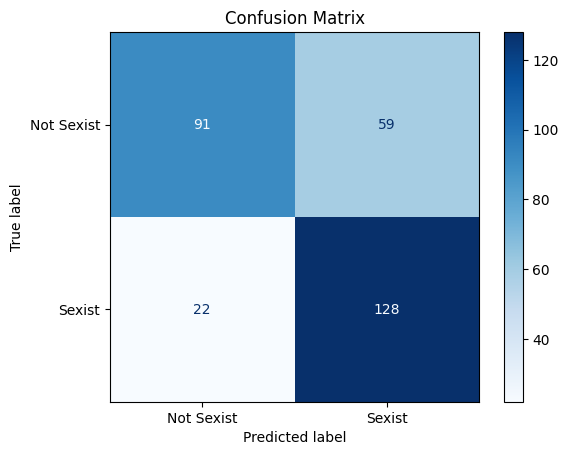

In [30]:
print("Basic model performance and results")

compute_and_plot_metrics(raw_resp_mistral, test_data['label_sexist'], pattern = 'ANSWER:\n')

print("\n\nFew shot model performance and results (3 examples per category)")
compute_and_plot_metrics(raw_resp_fewshot_mistral, test_data['label_sexist'], pattern = 'ANSWER:\n')

### Result Analysis

We will start by aggregating the model performances of the two models in a table.

| Model         | Standard Model Accuracy | Few-Shot Model Accuracy |
|---------------|--------------------------|--------------------------|
| **Mistral 8 B**| 59.00%                  | 73.00%                  |
| **Qwen 8 B**   | 73.30%                  | 72.00%                  |

Analysis of the Results:

**Mistral 8B**:

We can see significant performance improvement from 59.00% to 73.00% with few-shot prompting. This perfectly shows how providing some examples to the model and can result in performance increases of up to 14%.
If we look at the confusion matrix afferent for Mistral, we can gain several insights of why this is happening.
The base model (first confusion matrix) tells us that the model has a strong bias towards saying that a text is not sexist(120 false positive prediction for the 'Not sexist' label). Adding few-shot prompting improves the model's performance. It significantly reduces the before-mentioned bias(the FP decrease with almost 50% (120 -> 59)) and thus resulting in a better classification performance.

Comparing the two matrices with a bird eye view, we can see that the few-shoted version of the model has a much more balanced confusion matrix. While there is a significant increase in the FN section of the model (3->22), we find this result acceptable as the model is now able to determine if a text is not sexist with a much better precision. Before, the model would classify have a TP to FP classification rate of 1:4, while the second version(few-shot) has a much better rate of 1.78 : 1.

**Qwen 8B**:

The base model starts from an accuracy of 73.3%, showing comparable results with the few-shot iteration of the Mistral 8b model. If we look at the two confusion matrices, we can see that the base model does in fact perform better than the few-shot version of the model. When adding few-shot examples, the model has a slight decrease in performance (around 1-2 percent) and has a slight increase in the missclarification error(the number of FP and FN increase for the few-shoted version).


### Other experiments

We experimented with modifying the few-shot inference prompt. We found success with the following prompt:

In [1]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify the given input text as containing sexism or not. Follow the instructions carefully:

        
        Review the examples provided to understand the distinctions between sexist and non-sexist content.
        Analyze the TEXT based on your knowledge and insights from the examples.
        Decide if the test is sexist.
        Check your solution to be logically sound. Ask the question: "Is this text really sexist, or it just seems to be?".
        Make your FINAL decision. Answer 'YES' if the text is sexist, 'NO' otherwise

        IMPORTANT:
        
        Classify the TEXT as 'YES' if it contains sexism.
        Classify the TEXT as 'NO' if it does not contain sexism.
        Respond ONLY with 'YES' or 'NO.'


        EXAMPLES:
        {examples}

        TEXT:
        {text}

        ANSWER:
        """
    }
]

It is important to mention that we also tested the LLama 3.1 Instruct model, and it showed similar behavior with the Qwen model we are using now, if the prompt is not enhanced. With the prompt provided above, and using 2-3 examples per label, we managed to have improvements of up to 7% in accuracy, up to 78 percent accuracy.

Furthermore, we experimented with the order in which the examples should be showed. Initially, we tried giving the examples grouped by label("YES", "YES", "NO", "NO"). We observed, that even with the enhanced version of the prompt, the model would present biases towards a certain category. This problem was solved by our current approach, in which we alternate the order in which we show the examples to the model. Specifically, we alternate one "YES" example with one "NO" example. This approach showed better results.

Additionally, we experimented with many other few_shot values(number of examples we provided per category), but we observed that the more examples we provided, the accuracy would either slightly increase or decrease dramatically. We settled on a number of few-shots of 3, as in our experience it provides a reasonable compromise between computational requirements and performace.

# [Task 7 - 1.0 points] Report

Wrap up your experiment in a short report (up to 2 pages).

### Instructions

* Use the NLP course report template.
* Summarize each task in the report following the provided template.

### Recommendations

The report is not a copy-paste of graphs, tables, and command outputs.

* Summarize classification performance in Table format.
* **Do not** report command outputs or screenshots.
* Report learning curves in Figure format.
* The error analysis section should summarize your findings.

# Submission

* **Submit** your report in PDF format.
* **Submit** your python notebook.
* Make sure your notebook is **well organized**, with no temporary code, commented sections, tests, etc...

# FAQ

Please check this frequently asked questions before contacting us.

### Model cards

You can pick any open-source model card you like.

We recommend starting from those reported in this assignment.

### Implementation

Everything can be done via ``transformers`` APIs.

However, you are free to test frameworks, such as [LangChain](https://www.langchain.com/), [LlamaIndex](https://www.llamaindex.ai/) [LitParrot](https://github.com/awesome-software/lit-parrot), provided that you correctly address task instructions.

### Bonus Points

0.5 bonus points are arbitrarily assigned based on significant contributions such as:

- Outstanding error analysis
- Masterclass code organization
- Suitable extensions
- Evaluate A1 dataset and perform comparison

Note that bonus points are only assigned if all task points are attributed (i.e., 6/6).

### Prompt Template

Do not change the provided prompt template.

You are only allowed to change it in case of a possible extension.

### Optimizations

Any kind of code optimization (e.g., speedup model inference or reduce computational cost) is more than welcome!

# The End